---

Load essential packages

---

In [17]:
## Load essential packages
import random
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.dates as mdates
plt.style.use('dark_background')
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

---

Mount Google Drive folder if running Google Colab

---

In [18]:
## Mount Google drive folder if running in Colab
if('google.colab' in sys.modules):
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    DIR = '/content/drive/MyDrive/Colab Notebooks/sem1/ALA/Codes'
    DATA_DIR = DIR + '/Data/'
    os.chdir(DIR)
else:
    DATA_DIR = 'Data/'

Mounted at /content/drive


---

Read glass dataset

---

In [19]:
# Read glass dataset
FILE = DATA_DIR + 'glass.csv'
dfGlass = pd.read_csv(FILE,header=0)
dfGlass.describe() # It gives the staticical values of the dataset

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
dfGlass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


---

Train-test split the data using only refractive index and Aluminium Oxide weight percentage as features and Type values as the target

---

In [20]:
## Train-test split the data using only refractive index and Aluminium Oxide
## weight percentage as features and Type values as the target
X = dfGlass[['RI','Al']]
y = dfGlass['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---

Standardize the columns of the training data and use that standardization to standardize the columns of the test data

---

In [21]:
## Standardize the columns of the training data and use that standardization
## to standardize the columns of the test data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

---

Label encode the target variable for the training data and use the same label encoder model to label encode the test data

---

In [ ]:
## Label encode the target variable for the training data and use the same
## label encoder model to label encode the test data

---

Scatter plot between RI and Al

---

Text(0.5, 0.98, 'Scatter plot between standardized Al and RI values')

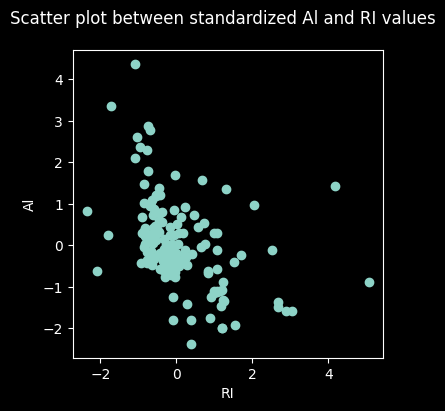

In [22]:
## Scatter plot between the RI and Al
fig = plt.figure(figsize=(4, 4))
plt.scatter(X_train[:,0], X_train[:,1])
plt.xlabel('RI')
plt.ylabel('Al')
fig.suptitle('Scatter plot between standardized Al and RI values', fontsize = 12)

---

The Kmeans class

---

In [61]:
## The kmeans class
class K_Means:
    def __init__(self, k = 3, tol = 1e-10, itermax = 1000, init_method='kmeans'):
        self.k = k # set variable for number of clusters
        self.tol = tol # set variable for stopping tolerance
        self.itermax = itermax # set variable for maximum iterations
        self.init_method = init_method

    def initialize_centroids(self, data):
        if self.init_method == 'kmeans':
            # Initialize centroids using random sampling
            random_indices = random.sample(range(len(data)), self.k)
            #dictionary comprehension- create a dict with key 'i' and value 'data[j]'
            # key is cluster number and value are list of sample in that cluster
            return {i: data[j] for i,j in zip(range(self.k),random_indices)}
        elif self.init_method == 'kmeans++':
            # Initialize centroids using KMeans++ algorithm
            centroids = np.zeros((self.k, data.shape[1]))
            centroids[0] = data[random.choice(range(len(data)))]

            for i in range(1, self.k):
                distances = np.min([np.linalg.norm(data - c, axis=1) ** 2 for c in centroids[:i]], axis=0)
                probabilities = distances / np.sum(distances)
                next_centroid = data[np.random.choice(len(data), p=probabilities)]
                centroids[i] = next_centroid

            return {i: centroids[i] for i in range(self.k)}
        else:
            raise ValueError("Choose 'random' or 'kmeans++'.")

    def fit(self, data):
      if isinstance(data, pd.DataFrame):
            data = data.values
      # Create an empty dictionary to store the cluster representatives (also known as centroids of each cluster)
      self.centroids = self.initialize_centroids(data)

      # Begin kmeans iterations
      self.clustering_objective = 0 # set clustering objective to zero at the beginning
      for j in range(self.itermax): # run till maximum no. of iterations
        # Create an empty dictionary to store the samples in each group (or cluster)
        self.clusters = {}
        for i in range(self.k):
          self.clusters[i] = []
        # Find the distance between a data point (sample) and each one of the k clusters; choose the nearest centroid
        for sample in data:
          # Calculate distance of sample to each centroid
          sample_distances_to_centroids = [np.linalg.norm(sample - self.centroids[centroid]) for centroid in self.centroids]
          # Get the index of the nearest centroid (cluster or group number) for the sample
          nearest_centroid_index = np.argmin(sample_distances_to_centroids)
          # Add sample to the group containing the nearest centroid
          self.clusters[nearest_centroid_index].append(sample)

        # Recalculate the cluster centroids
        for cluster in self.clusters:
            self.centroids[cluster] = np.mean(self.clusters[cluster], axis=0)

        # Calculate the clustering objective function for the current iteration
        new_clustering_objective = 0
        for cluster in self.clusters:
          new_clustering_objective += sum(np.linalg.norm(sample - self.centroids[cluster])**2 for sample in self.clusters[cluster])
        new_clustering_objective = (1/len(data)) * new_clustering_objective

        # Print iteration details
        print(f'Iteration # = {j+1}, clustering objective = {new_clustering_objective}')

        # Break out of the outermost for-loop if the results are optimal
        rel_error = np.abs(new_clustering_objective - self.clustering_objective) / new_clustering_objective
        if  rel_error < self.tol:
          break

        # Update clustering objective
        self.clustering_objective = new_clustering_objective
      return self.clustering_objective

    # Function to predict cluster for new incoming test sample
    def pred(self, data):
      # Calculate distance of sample to each centroid
      sample = data
      sample_distance_to_centroids = [np.linalg.norm(sample - self.centroids[centroid]) for centroid in self.centroids]
      # Get the index of the nearest centroid (cluster or group number) for the test sample
      nearest_centroid_index = np.argmin(sample_distance_to_centroids)
      # Add sample to the group containing the nearest centroid
      return nearest_centroid_index

    def plot_clusters(self, data):
      marker_styles = ['o', '*', '^', 'v', 'x', '+','s','>','<','D','H']

      # Extract clustering results
      k = self.k
      colors = cm.rainbow(np.linspace(0, 1, k))

      for cluster, color in zip(self.clusters.keys(), colors):
          marker = marker_styles[cluster % len(marker_styles)]  # Ensure marker style is within bounds
          for sample in self.clusters[cluster]:
              plt.scatter(sample[0], sample[1], color=color, marker=marker, label=f'Cluster {cluster}' if len(self.clusters[cluster]) == 1 else "")

      plt.xlabel('RI')
      plt.ylabel('Al')
      plt.title('KMeans Clustering')
      plt.show()

Iteration # = 1, clustering objective = 1.4471733452053295
Iteration # = 2, clustering objective = 1.3405012091243136
Iteration # = 3, clustering objective = 1.3220538643765865
Iteration # = 4, clustering objective = 1.316948118038693
Iteration # = 5, clustering objective = 1.3142847011533554
Iteration # = 6, clustering objective = 1.312367206370968
Iteration # = 7, clustering objective = 1.3067991903226615
Iteration # = 8, clustering objective = 1.2975091441749735
Iteration # = 9, clustering objective = 1.2903608540923124
Iteration # = 10, clustering objective = 1.2778427001638
Iteration # = 11, clustering objective = 1.2670741971765875
Iteration # = 12, clustering objective = 1.2453183931733174
Iteration # = 13, clustering objective = 1.2125914293287738
Iteration # = 14, clustering objective = 1.1863033524555435
Iteration # = 15, clustering objective = 1.1796673411646528
Iteration # = 16, clustering objective = 1.1781554579513682
Iteration # = 17, clustering objective = 1.17771850562

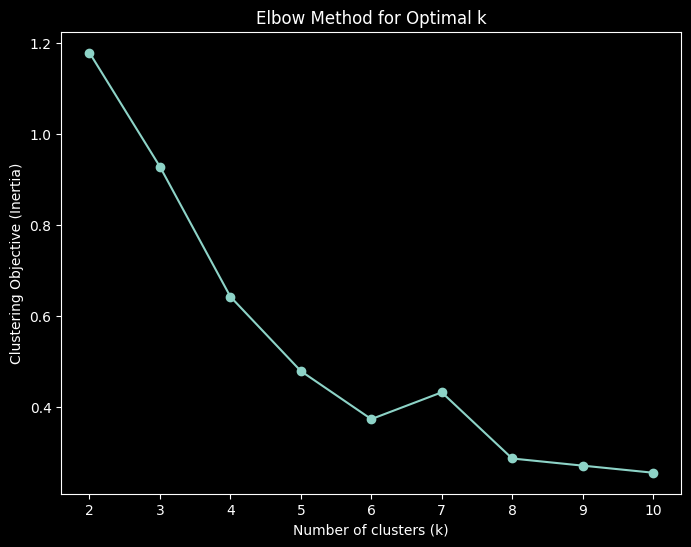

In [62]:
l = []
k_values = range(2, 11)

for k in k_values:
    km = K_Means(k=k)
    objective = km.fit(X_train)
    l.append(objective)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, l, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Clustering Objective (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()

Iteration # = 1, clustering objective = 0.8268304279839518
Iteration # = 2, clustering objective = 0.6575607703580066
Iteration # = 3, clustering objective = 0.4866516350894512
Iteration # = 4, clustering objective = 0.4079593585381441
Iteration # = 5, clustering objective = 0.38856661748985233
Iteration # = 6, clustering objective = 0.3796283887684113
Iteration # = 7, clustering objective = 0.3770990581833703
Iteration # = 8, clustering objective = 0.375255670342189
Iteration # = 9, clustering objective = 0.37484369700862036
Iteration # = 10, clustering objective = 0.37471352175693906
Iteration # = 11, clustering objective = 0.37471352175693906


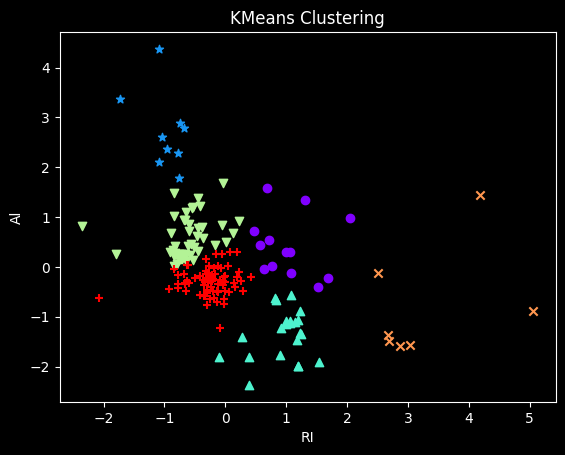

In [63]:
k = 6
km = K_Means(k=k)
km.fit(X_train)
km.plot_clusters(X_train)

Iteration # = 1, clustering objective = 0.5029738249670027
Iteration # = 2, clustering objective = 0.45527149925189947
Iteration # = 3, clustering objective = 0.45230543172044935
Iteration # = 4, clustering objective = 0.4516538673337395
Iteration # = 5, clustering objective = 0.4514607416875798
Iteration # = 6, clustering objective = 0.4514607416875798


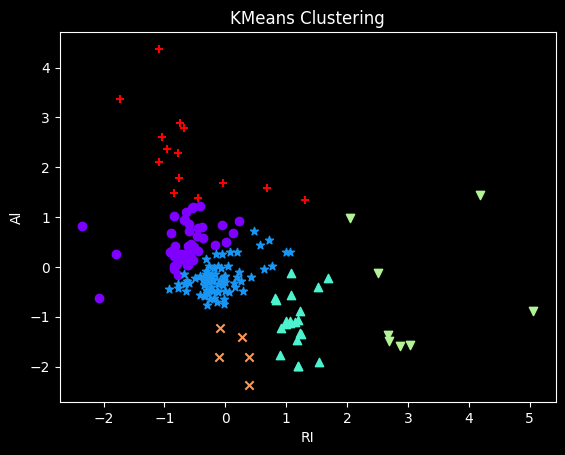

In [65]:
k = 6
km = K_Means(k=k, init_method='kmeans++')
km.fit(X_train)
km.plot_clusters(X_train)